# Examen Interciclo 
Bryam Chimbo

# Primer punto
Generar un modelo matematicos(2) y probabilistico de prediccion de las personas recuperadas  en la proxima semana (7 dias despues y un mes despues).

In [211]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [182]:
# Actualizar los datos (URL)
url = 'datosCovidEcuador.csv'
df = pd.read_csv(url)
df

,numero de dias,Total recuperados
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
74,75,103.0
75,76,0.0
76,77,0.0
77,78,0.0


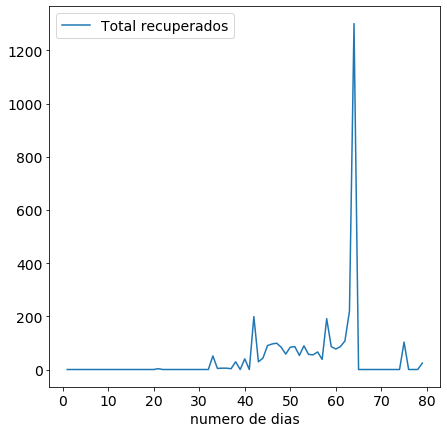

In [23]:
df.plot( x='numero de dias', y='Total recuperados')

79 Total de personas recuperdas del covid en Ecuador 3560


<function matplotlib.pyplot.show(*args, **kw)>

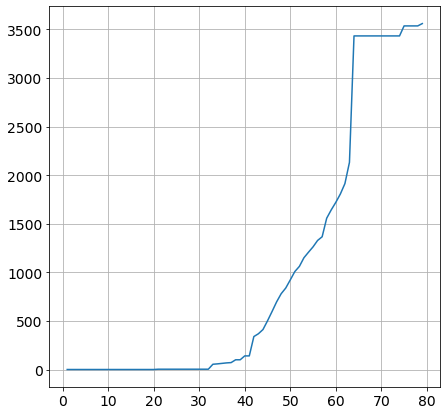

In [181]:
#x = list(df.iloc [:, 0]) # Fecha
#y = list(df.iloc [:, 1]) # Numero de casos
datos=df['Total recuperados']
recuperados=[]
cont=0

for i in range(len(datos)):
    cont+=int(datos[i])
    recuperados.append(cont)
    
x=range(1,len(recuperados)+1)
y=recuperados
print(len(y),"Total de personas recuperdas del covid en Ecuador",y[len(y)-1])
plt.plot(x,y,label="Personas Recuperadas")
plt.legend
plt.grid(True)
plt.show

# Modelo Lineal

# prediccion a 7 dias

Coefficients: 
 [51.78181597]
Independent term: 
 -1047.196689386563
Prediccion a 7 dias 3354
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84]


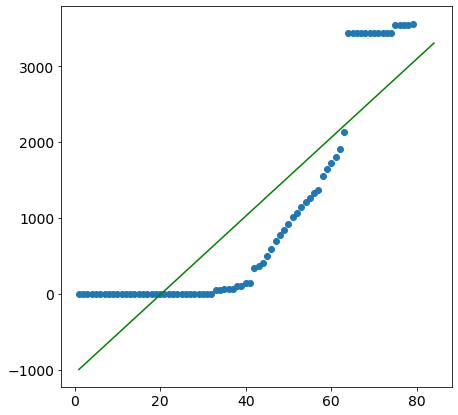

Prediccion por dia hasta llegar a 7 dias
[2836.43950828]
[2888.22132425]
[2940.00314021]
[2991.78495618]
[3043.56677215]
[3095.34858812]
[3147.13040409]


In [173]:
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
y_prediccion = regr.predict([[85]])
print("Prediccion a 7 dias",int(y_prediccion))
plt.scatter(x, y)
x2 = np.array(range(1, 85))
print(x2)
plt.plot(x2, regr.predict(x2.reshape(-1, 1)), color='green')
plt.show()
print("Prediccion por dia hasta llegar a 7 dias")
for i in range(7):
    print(regr.predict([[75+i]]))

# prediccion a 31 dias

Coefficients: 
 [51.78181597]
Independent term: 
 -1047.196689386563
Prediccion a 30 dias 4959
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115]


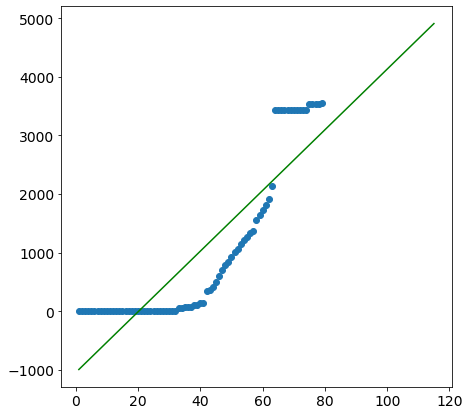

Prediccion por dia hasta llegar a 31 dias
[3354.25766796]
[3406.03948393]
[3457.8212999]
[3509.60311587]
[3561.38493184]
[3613.16674781]
[3664.94856378]
[3716.73037975]
[3768.51219572]
[3820.29401168]
[3872.07582765]
[3923.85764362]
[3975.63945959]
[4027.42127556]
[4079.20309153]
[4130.9849075]
[4182.76672347]
[4234.54853944]
[4286.3303554]
[4338.11217137]
[4389.89398734]
[4441.67580331]
[4493.45761928]
[4545.23943525]
[4597.02125122]
[4648.80306719]
[4700.58488315]
[4752.36669912]
[4804.14851509]
[4855.93033106]
[4907.71214703]


In [163]:
regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
y_prediccion = regr.predict([[116]])
print("Prediccion a 30 dias",int(y_prediccion))
plt.scatter(x, y)
x2 = np.array(range(1, 116))
print(x2)
plt.plot(x2, regr.predict(x2.reshape(-1, 1)), color='green')
plt.show()
print("Prediccion por dia hasta llegar a 31 dias")
for i in range(31):
    print(regr.predict([[85+i]]))

# Modelo Logistico

# prediccion a 7 dias

(array([-2234.83563068,   956.043545  ]), array([[204971.16289703, -56125.78962735],
       [-56125.78962735,  16465.22075255]]))



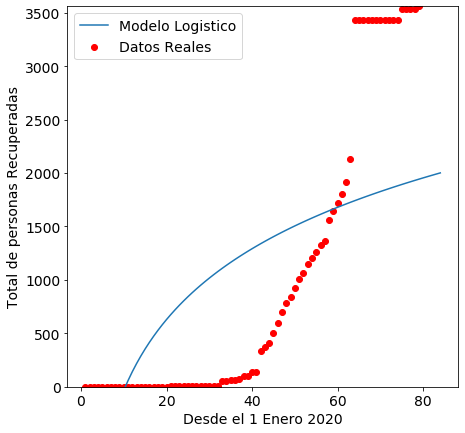

*****Prediccion por dia hasta llegar a 7 dias*****
1892.8710108592754
1905.5340243956366
1918.0315035977605
1930.3677204995952
1942.54678386364
1954.5726473964137
1966.4491174536138


In [178]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)
print()
pred_x = range(1,85) 
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data

plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas Recuperadas")
plt.ylim((min(y),max(y))) # Definir los limites de Y
plt.show()
print("*****Prediccion por dia hasta llegar a 7 dias*****")
for i in range(7):
    print(modelo_logistico(75+i,exp_fit[0][0],exp_fit[0][1]))


# prediccion a 31 dias

(array([-2234.83563068,   956.043545  ]), array([[204971.16289703, -56125.78962735],
       [-56125.78962735,  16465.22075255]]))



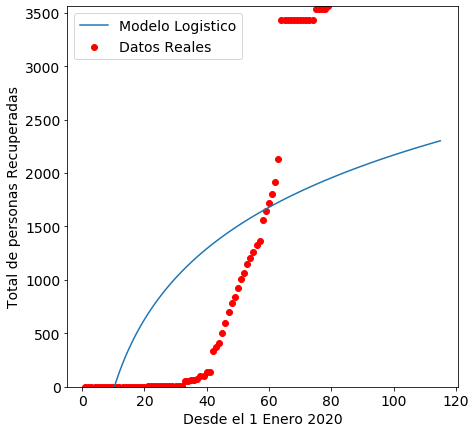

*****Prediccion por dia hasta llegar a 31 dias*****
2012.5324257518173
2023.7143490694284
2034.766998700818
2045.6933295707108
2056.4961964325553
2067.1783583456886
2077.742482905132
2088.191150240235
2098.5268567971593
2108.7520189190877
2118.8689762369854
2128.879994882827
2138.7872705363257
2148.5929313154134
2158.299040519985
2167.9075992377643
2177.4205488205057
2186.8397732382296
2196.1671013185946
2205.404308878083
2214.5531207512254
2223.6152127236332
2232.592213374282
2241.4857058321018
2250.2972294516144
2259.0282814120606
2267.6803182441495
2276.2547572883636
2284.7529780884274
2293.1763237233986
2301.5261020815838


In [212]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)
print()
pred_x = range(1,116) 
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data

plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas Recuperadas")
plt.ylim((min(y),max(y))) # Definir los limites de Y
plt.show()
print("*****Prediccion por dia hasta llegar a 31 dias*****")
for i in range(31):
    print(modelo_logistico(85+i,exp_fit[0][0],exp_fit[0][1]))

# Probabilistico

Mediana 3.0
Media 55.625
*****PREDICCION A 7 DIAS*****
Prediccion a 7 dias 45


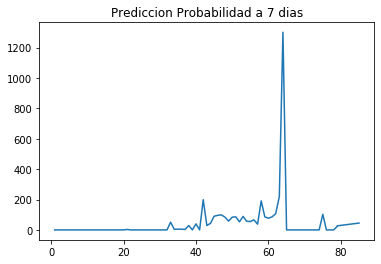

*****PREDICCION A 7 DIAS*****
Prediccion a 31 dias 138


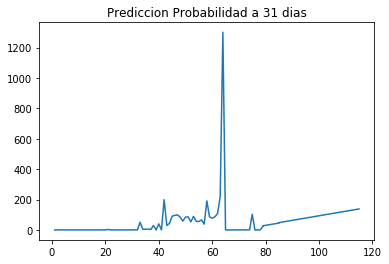

In [210]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
filtro = df["Total recuperados"][15:]
media = filtro.mean()
mediana = filtro.median()
print("Mediana",mediana)
print("Media",media)
y_prob = list(df.iloc [:, 1]) # Total casos
x_prob = list(df.iloc [:, 0]) 
prediccion_siguiente1 = int(y_prob[-1]+7+mediana)
prediccion_siguiente2 = int(y_prob[-1]+31+mediana)
print("*****PREDICCION A 7 DIAS*****")
for i in range(x_prob[-1], x_prob[-1]+7):
    x_prob.append(i)
    y_prob.append(int(y_prob[-1] + mediana))
plt.plot(x_prob,y_prob)
print("Prediccion a 7 dias",y_prob[-1])
plt.title('Prediccion Probabilidad a 7 dias')
plt.show()

print("*****PREDICCION A 7 DIAS*****")
for i in range(x_prob[-1], x_prob[-1]+31):
    x_prob.append(i)
    y_prob.append(int(y_prob[-1] + mediana))
plt.plot(x_prob,y_prob)
print("Prediccion a 31 dias",y_prob[-1])
plt.title('Prediccion Probabilidad a 31 dias')
plt.show()

# Finalmente, contrarestar los modelos matematicos y probabilistico y generar las siguientes conclusiones
•	Cual tiene una mejor prediccion.
En base a los modelos empleados el que a mi parecer consta de una mejor prediccion es el modelo lineal ya que estima que en una semana puedan tener un total de 3354 en Ecuador y en un estimado a un mes de 4907 personas recuperadas de covid en Ecuador
•	Ventajas y desventajas de los modelos.
Una ventaja princial del modelo linea es que su estructura es tan sencilla que se puede comprender rapidamente, ya que solo consiste en dibujar una recta de u conjunto de datos que estemos utilizando.Mientras que una desventaja de este cabria en los cuando intentamos trabajar con datos con relaciones mas complejas. En cuanto al modelo logistio tiene la ventaja de poder describir el crecimiento que una infección puede tener en una poblacion aun su curva no es del todo acertada con los datos obtenidos lo cual es una desventaja que basicamente los puntos no estan del todo simetricos con la curva de prediccion. Y el modelo probabilistico realiza un análisis probabilistico simple del crecimiento de la infección lo cual le prmite comprender mejor la evolución de la infección.
•	Comparacion entre los modelos aplicados.
El modelo lineal realiza un estimado de en 7 dias:3354 personas recuperadas y en 31 dias:4907 personas recuperadas
El modelo logistio realiza un estimado de en 7 dias:1966 personas recuperadas y en 31 dias:2301 personas recuperadas
El modelo probalilistico realiza un estimado de en 7 dias:45 personas recuperadas y en 31 dias:138 personas recuperadas


# Posteriormente se debe seguir un procesos para la reinsercion 


In [220]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

In [276]:
#PARAMETROS
Entidad_de_Trabajo=1
total_consultorios_de_trabajo=110
numero_total_recuperados = 4907
dias_descanso=7
dias_teletrabajo=14
dias_que_recide=4
dias_simulacion=220
taza_crecimiento=3
tiempo_evaluacion=1


trabajos_total={}
total_desempleados={}
trabajo_tipo_alimentos={}
trabajo_tipo_ocio={}
trabajo_tipo_retail={}
trabajo_tipo_viajes={}
trabajo_tipo_hoteles={}
trabajo_tipo_restaurante={}


Simulacion Recuperados


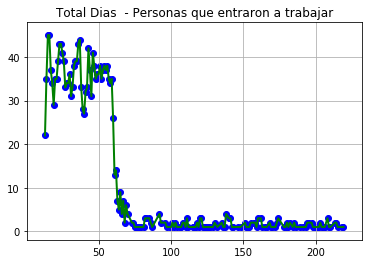

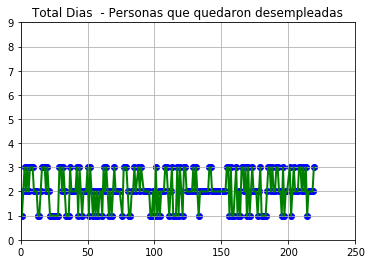

In [277]:
class trabajo_entidad(object):
    #constructor
    def __init__(self, env, num_consultorios, name):
            self.env = env
            self.num_consultorios=num_consultorios
            self.consultorios=simpy.Resource(env, num_consultorios)
            self.name = name
    
    def descanso_domiciliario(self, persona):
        yield self.env.timeout(random.randint(dias_descanso-5, dias_descanso+5))
        
    def ingresar_teletrabajo(self,persona):
        yield self.env.timeout(random.randint(dias_teletrabajo-5, dias_teletrabajo+5))
        
    def reicide_a_teletrabajo(self,persona):
        yield self.env.timeout(random.randint(dias_que_recide-3, dias_que_recide+3))
    
    def evaluacion(self, persona):
        yield self.env.timeout(tiempo_evaluacion)
        

def llegada_persona(env, trabajo_entidad, persona):
    arrive = env.now
    estado = random.randint(1,100)
    if (estado <= 35):
        yield env.process(trabajo_entidad.descanso_domiciliario(persona))
        tiempo_trabajo=random.randint(1,5)
        if (tiempo_trabajo == 1):
            yield env.process(trabajo_entidad.ingresar_teletrabajo(persona))
            while True:
                with trabajo_entidad.consultorios.request() as consultorioss:
                    dias_esperando = random.randint(1,220)
                    requerimiento = yield consultorioss | env.timeout(dias_esperando)
                    if consultorioss in requerimiento:
                        yield env.process(trabajo_entidad.evaluacion(persona))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(trabajo_entidad.reicide_a_teletrabajo(persona))
                        else:
                            trabajos_total[env.now] = trabajos_total[env.now] + 1 if env.now in trabajos_total else  1
                            trabajo_tipo_alimentos[env.now] = trabajo_tipo_alimentos[env.now] + 1 if env.now in trabajo_tipo_alimentos else  1
                            break
    
        if (tiempo_trabajo == 2):
            yield env.process(trabajo_entidad.ingresar_teletrabajo(persona))
            while True:
                with trabajo_entidad.consultorios.request() as consultorioss:
                    dias_esperando = random.randint(1,220)
                    requerimiento = yield consultorioss | env.timeout(dias_esperando)
                    if consultorioss in requerimiento:
                        yield env.process(trabajo_entidad.evaluacion(persona))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(trabajo_entidad.reicide_a_teletrabajo(persona))
                        else:
                            trabajos_total[env.now] = trabajos_total[env.now] + 1 if env.now in trabajos_total else  1
                            trabajo_tipo_retail[env.now] = trabajo_tipo_retail[env.now] + 1 if env.now in trabajo_tipo_retail else  1
                            break
        if (tiempo_trabajo == 3):
            yield env.process(trabajo_entidad.ingresar_teletrabajo(persona))
            while True:
                with trabajo_entidad.consultorios.request() as consultorioss:
                    dias_esperando = random.randint(1,220)
                    requerimiento = yield consultorioss | env.timeout(dias_esperando)
                    if consultorioss in requerimiento:
                        yield env.process(trabajo_entidad.evaluacion(persona))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(trabajo_entidad.reicide_a_teletrabajo(persona))
                        else:
                            trabajos_total[env.now] = trabajos_total[env.now] + 1 if env.now in trabajos_total else  1
                            trabajo_tipo_restaurante[env.now] = trabajo_tipo_restaurante[env.now] + 1 if env.now in trabajo_tipo_restaurante else  1
                            break
        if (tiempo_trabajo == 4):
            yield env.process(trabajo_entidad.ingresar_teletrabajo(persona))
            while True:
                with trabajo_entidad.consultorios.request() as consultorioss:
                    dias_esperando = random.randint(1,220)
                    requerimiento = yield consultorioss | env.timeout(dias_esperando)
                    if consultorioss in requerimiento:
                        yield env.process(trabajo_entidad.evaluacion(persona))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(trabajo_entidad.reicide_a_teletrabajo(persona))
                        else:
                            trabajos_total[env.now] = trabajos_total[env.now] + 1 if env.now in trabajos_total else  1
                            trabajo_tipo_viajes[env.now] = trabajo_tipo_viajes[env.now] + 1 if env.now in trabajo_tipo_viajes else  1
                            break
        if (tiempo_trabajo == 5):
            yield env.process(trabajo_entidad.ingresar_teletrabajo(persona))
            while True:
                with trabajo_entidad.consultorios.request() as consultorioss:
                    dias_esperando = random.randint(1,220)
                    requerimiento = yield consultorioss | env.timeout(dias_esperando)
                    if consultorioss in requerimiento:
                        yield env.process(trabajo_entidad.evaluacion(persona))
                        evaluacion = random.randint(1,100)
                        if(evaluacion<=30):
                            yield env.process(trabajo_entidad.reicide_a_teletrabajo(persona))
                        else:
                            trabajos_total[env.now] = trabajos_total[env.now] + 1 if env.now in trabajos_total else  1
                            trabajo_tipo_hoteles[env.now] = trabajo_tipo_hoteles[env.now] + 1 if env.now in trabajo_tipo_hoteles else  1
                            break
    
    else:
        total_desempleados[env.now] = total_desempleados[env.now] + 1 if env.now in total_desempleados else  1


    

def ejecutar(env, taza_crecimiento, numero_total_recuperados):
    trabajo_entidadA = trabajo_entidad(env,total_consultorios_de_trabajo, "A")
    for i in range(numero_total_recuperados):
        asignar_trabajo_entidad(env, trabajo_entidadA, i)
    persona = numero_total_recuperados
    while True:
        yield env.timeout(1)
        for i in range(taza_crecimiento):
            persona += 1
            asignar_trabajo_entidad(env, trabajo_entidadA, persona)
                
def asignar_trabajo_entidad(env, trabajo_entidadA, persona):
    empre_esc = 1
    if (empre_esc == 1):
        env.process(llegada_persona(env, trabajo_entidadA, persona))

print("Simulacion Recuperados")
env=simpy.Environment()
env.process(ejecutar(env,taza_crecimiento, numero_total_recuperados))
env.run(until=dias_simulacion)
datos=sorted(trabajos_total.items()) 
x, y =zip(*datos) 
pp.plot(x[1:],y[1:],linewidth=2,color='green') 
pp.scatter(x[1:],y[1:],color='blue') 
pp.title("Total Dias  - Personas que entraron a trabajar")
pp.grid(True) 
pp.show() 

if (total_desempleados):
    datos=sorted(total_desempleados.items())
    x, y =zip(*datos) 
    pp.plot(x[1:],y[1:],linewidth=2,color='green') 
    pp.scatter(x[1:],y[1:],color='blue') 
    pp.title("Total Dias  - Personas que quedaron desempleadas")
    pp.ylim((0,9))
    pp.xlim(0,250) 
    pp.grid(True)
    pp.show() 
    


TOTAL TRABAJOS
Total Personas:  4907
Total trabajos:  1968
Total trabajos de alimentos:  393
Total trabajos de retail:  385
Total trabajos de restaurantes:  411
Total trabajos de viajes:  391
Total trabajos de Hoteles:  388
Total Desempleados:  3576


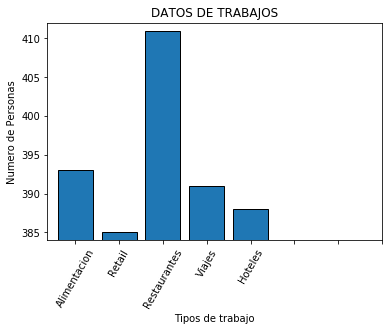

In [278]:
print("TOTAL TRABAJOS") 
print("Total Personas: ",numero_total_recuperados)
print("Total trabajos: ",sum(trabajos_total.values())) 
print("Total trabajos de alimentos: ",sum(trabajo_tipo_alimentos.values())) 
print("Total trabajos de retail: ",sum(trabajo_tipo_retail.values())) 
print("Total trabajos de restaurantes: ",sum(trabajo_tipo_restaurante.values())) 
print("Total trabajos de viajes: ",sum(trabajo_tipo_viajes.values()))
print("Total trabajos de Hoteles: ",sum(trabajo_tipo_hoteles.values()))
print("Total Desempleados: ",sum(total_desempleados.values()))
fechas = ['Alimentacion', 'Retail', 'Restaurantes', 'Viajes', 'Hoteles']
datos = [sum(trabajo_tipo_alimentos.values()),sum(trabajo_tipo_retail.values()) , sum(trabajo_tipo_restaurante.values()), sum(trabajo_tipo_viajes.values()), sum(trabajo_tipo_hoteles.values())]

pp.bar(range(5), datos, edgecolor='black')

pp.xticks(range(8), fechas, rotation=60)
pp.title("DATOS DE TRABAJOS")
plt.xlabel("Tipos de trabajo")
plt.ylabel("Numero de Personas")
pp.ylim(min(datos)-1, max(datos)+1)

pp.show()